<a href="https://colab.research.google.com/github/Tarun7386/Machine-Learning-Projects/blob/main/ML_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

import pickle

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ronbodnar/loan-eligibility-prediction/main/loan_data.csv')

# **Data Overview**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print(df['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Describe numerical columns within the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Describe categorical columns within the dataset.
df.describe(include = ['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# **Data Visualisation**

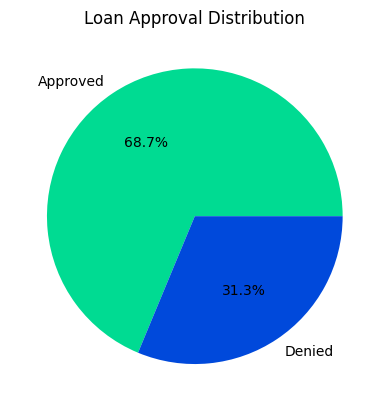

In [ ]:
# Visualize the balance of loan approvals to see if we will need to fix any imbalance
from matplotlib import pyplot as plt

plt.pie(df['Loan_Status'].value_counts().values, labels=['Approved', 'Denied'], colors=['#00db92', '#0049db'], autopct='%1.1f%%')
plt.title('Loan Approval Distribution')
plt.show();

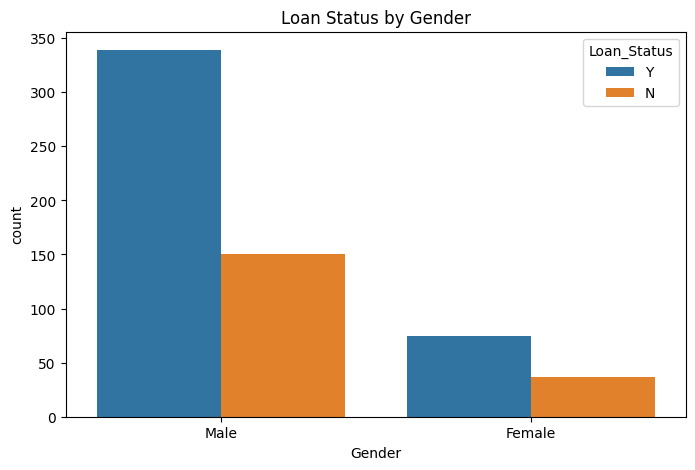

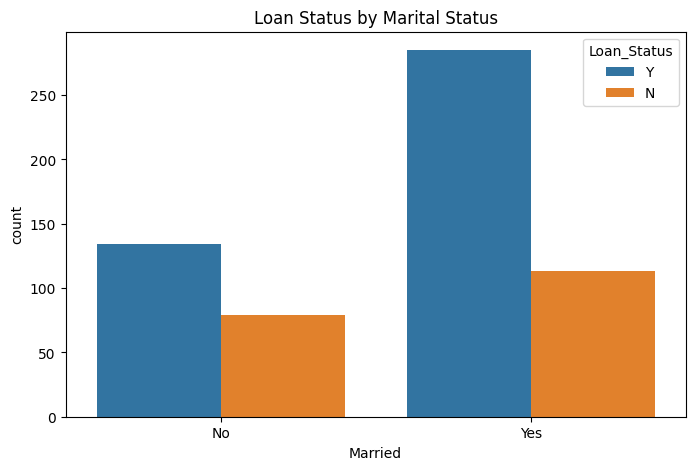

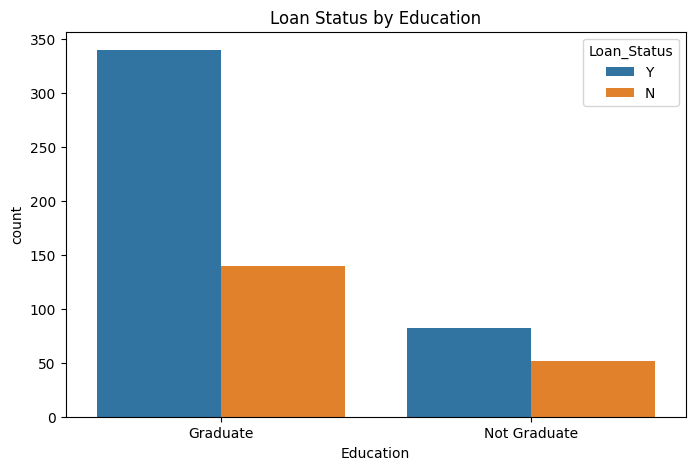

In [ ]:
# Visualize Categorical Variables
# Count Plot for Categorical Variables
# Count plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Loan Status by Gender')
plt.show()

# Count plot for Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title('Loan Status by Marital Status')
plt.show()

# Count plot for Education
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Loan Status by Education')
plt.show()


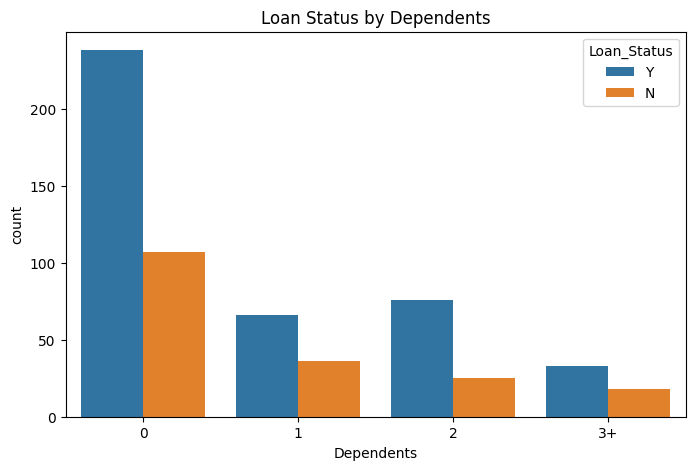

In [ ]:
# Bar Plot for Dependents
# Bar plot for Dependents
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.title('Loan Status by Dependents')
plt.show()


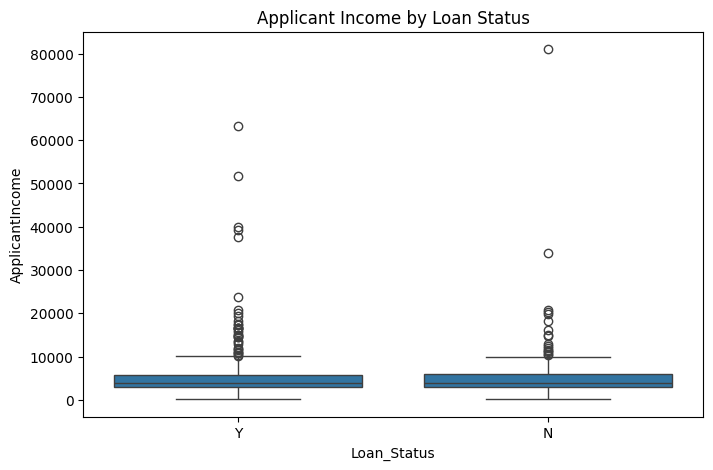

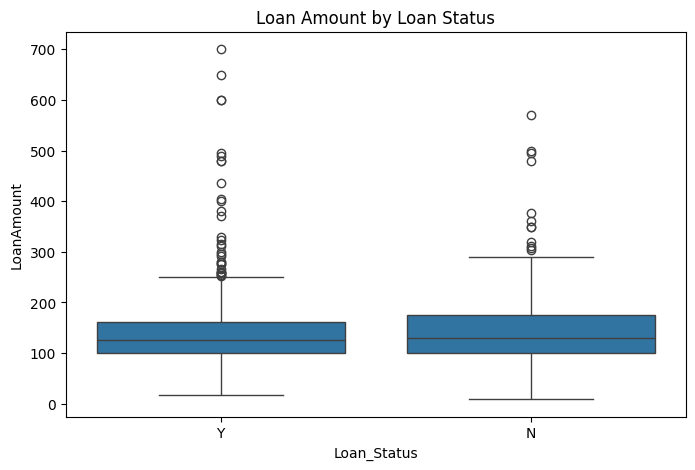

In [ ]:
# Visualize Numerical Variables
# Box plot for Applicant Income
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income by Loan Status')
plt.show()

# Box plot for Loan Amount
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title('Loan Amount by Loan Status')
plt.show()


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


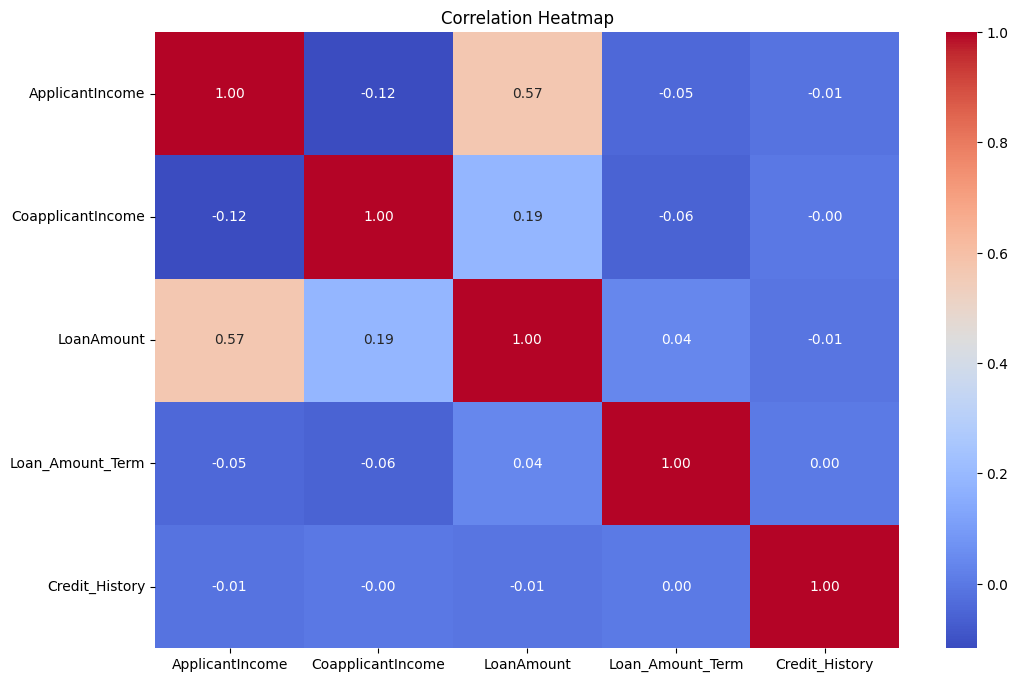

In [ ]:
# Display numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)
# Calculate correlation only for numeric columns
correlation_matrix_n = df[numeric_cols].corr()
# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_n, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


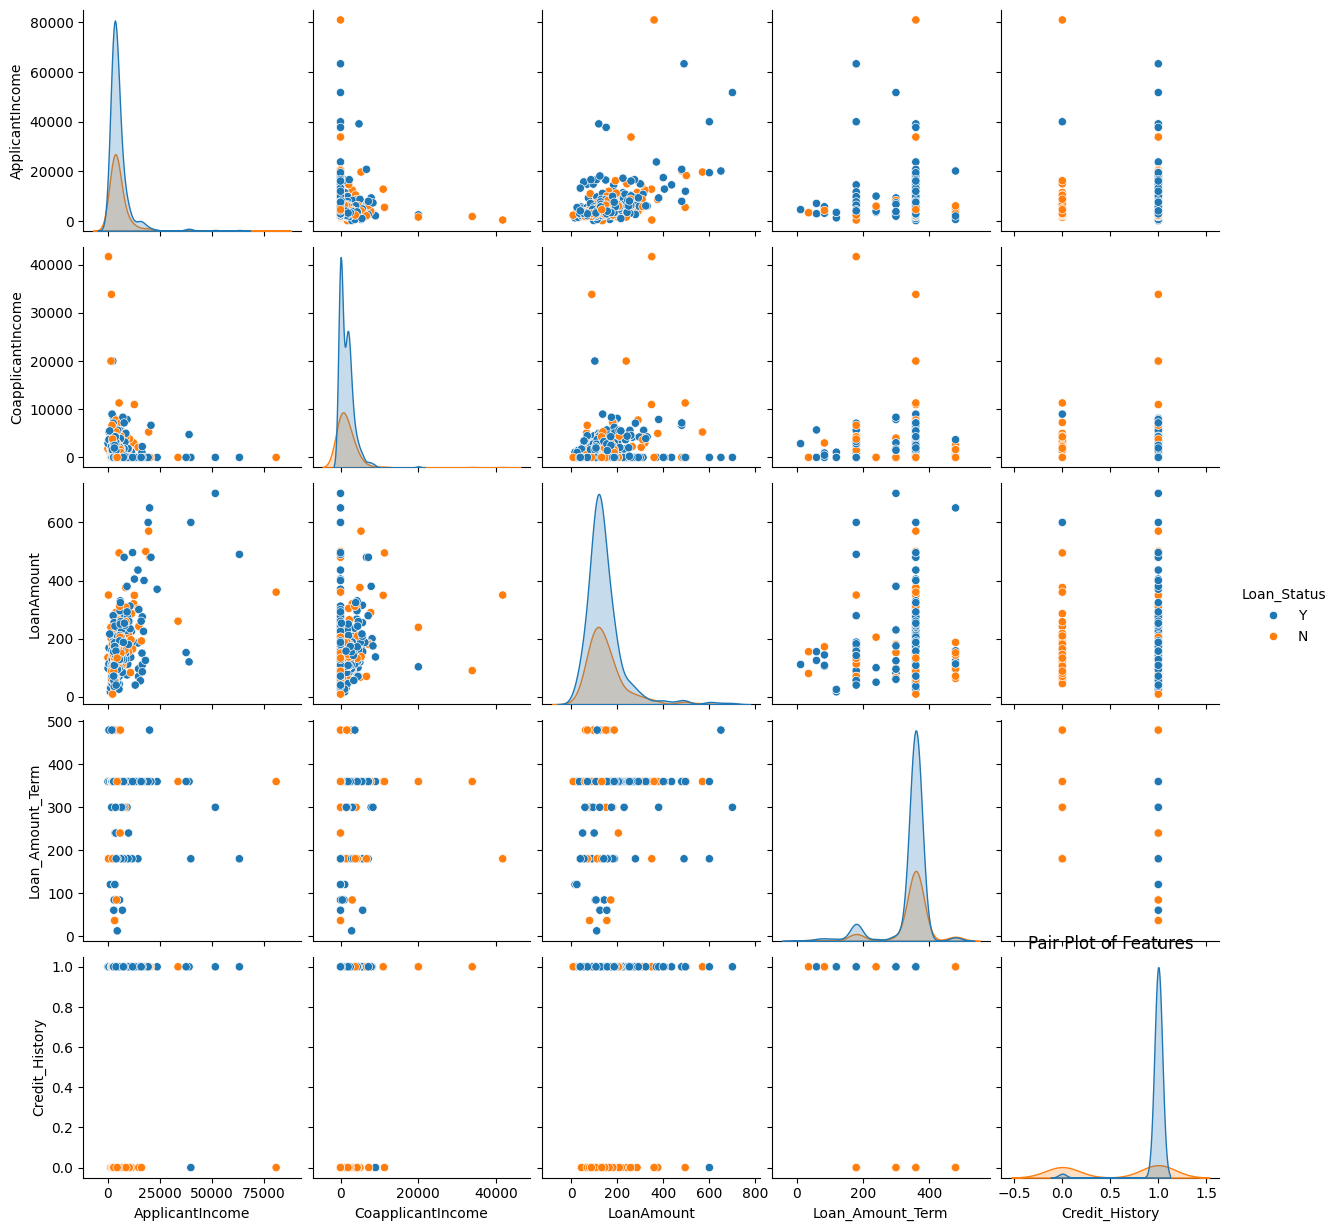

In [ ]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.title('Pair Plot of Features')
plt.show()

In [ ]:
df.drop(['Loan_ID'], axis=1, inplace=True)

# **One hot encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,5849,0.0,NaN,360.0,1.0,False,False,False,False,False,False,False,True,True
1,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False,False,False
2,1,3000,0.0,66.0,360.0,1.0,True,False,False,False,False,True,False,True,True
3,1,2583,2358.0,120.0,360.0,1.0,True,False,False,False,True,False,False,True,True
4,1,6000,0.0,141.0,360.0,1.0,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,True
610,1,4106,0.0,40.0,180.0,1.0,True,False,False,True,False,False,False,False,True
611,1,8072,240.0,253.0,360.0,1.0,True,True,False,False,False,False,False,True,True
612,1,7583,0.0,187.0,360.0,1.0,True,False,True,False,False,False,False,True,True


In [ ]:
# Check for missing values
print(data_encoded.isnull().sum())


Gender                      0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values for LoanAmount, Loan_Amount_Term, and Credit_History
imputer_loan_amount = SimpleImputer(strategy='median')
imputer_loan_term = SimpleImputer(strategy='most_frequent')
imputer_credit_history = SimpleImputer(strategy='most_frequent')

# Apply the imputers
data_encoded['LoanAmount'] = imputer_loan_amount.fit_transform(data_encoded[['LoanAmount']])
data_encoded['Loan_Amount_Term'] = imputer_loan_term.fit_transform(data_encoded[['Loan_Amount_Term']])
data_encoded['Credit_History'] = imputer_credit_history.fit_transform(data_encoded[['Credit_History']])
print(data_encoded.isnull().sum())

Gender                     0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64


In [ ]:
data_encoded

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,5849,0.0,128.0,360.0,1.0,False,False,False,False,False,False,False,True,True
1,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False,False,False
2,1,3000,0.0,66.0,360.0,1.0,True,False,False,False,False,True,False,True,True
3,1,2583,2358.0,120.0,360.0,1.0,True,False,False,False,True,False,False,True,True
4,1,6000,0.0,141.0,360.0,1.0,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,True
610,1,4106,0.0,40.0,180.0,1.0,True,False,False,True,False,False,False,False,True
611,1,8072,240.0,253.0,360.0,1.0,True,True,False,False,False,False,False,True,True
612,1,7583,0.0,187.0,360.0,1.0,True,False,True,False,False,False,False,True,True


# **Train & Test**

In [ ]:
X = data_encoded.drop('Loan_Status_Y', axis=1)  # assuming Loan_Status_Y is the target variable
y = data_encoded['Loan_Status_Y']
X.columns

Index(['Gender', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
X

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,5849,0.0,128.0,360.0,1.0,False,False,False,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False,False
2,1,3000,0.0,66.0,360.0,1.0,True,False,False,False,False,True,False,True
3,1,2583,2358.0,120.0,360.0,1.0,True,False,False,False,True,False,False,True
4,1,6000,0.0,141.0,360.0,1.0,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False
610,1,4106,0.0,40.0,180.0,1.0,True,False,False,True,False,False,False,False
611,1,8072,240.0,253.0,360.0,1.0,True,True,False,False,False,False,False,True
612,1,7583,0.0,187.0,360.0,1.0,True,False,True,False,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (491, 14)
y_train shape: (491,)


In [ ]:
X_train

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
83,1,6000,2250.0,265.0,360.0,1.0,True,False,False,False,False,False,True,False
90,1,2958,2900.0,131.0,360.0,1.0,True,False,False,False,False,False,True,False
227,1,6250,1695.0,210.0,360.0,1.0,True,False,True,False,False,False,True,False
482,1,2083,3150.0,128.0,360.0,1.0,True,False,False,False,False,False,True,False
464,1,4166,0.0,98.0,360.0,0.0,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1875,1875.0,97.0,360.0,1.0,True,False,True,False,True,True,True,False
106,1,11417,1126.0,225.0,360.0,1.0,True,False,True,False,False,False,False,True
270,0,3237,0.0,30.0,360.0,1.0,False,False,False,False,False,False,False,True
435,0,10047,0.0,128.0,240.0,1.0,False,False,False,False,False,False,True,False


# **Feature_Selection Corr**

 **1. Filter Method: Correlation Analysis**

In [ ]:

train_data = X_train.copy()
train_data['Loan_Status_Y'] = y_train.reset_index(drop=True)  # Add target variable to training data


# train_data.drop(['Gender'], axis=1, inplace=True)
correlation_matrix = train_data.corr()


loan_status_y_corr = correlation_matrix['Loan_Status_Y'].sort_values(ascending=False)

# Create a DataFrame to display the correlation values
correlation_df = pd.DataFrame(loan_status_y_corr).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Loan_Status_Y']

# Display the correlation DataFrame
correlation_df


,Feature,Correlation with Loan_Status_Y
0,Loan_Status_Y,1.000000
1,Gender,0.131951
2,Dependents_2,0.079426
3,Dependents_3+,0.076897
4,Education_Not Graduate,0.070413
5,ApplicantIncome,0.036454
6,Married_Yes,0.018247
7,LoanAmount,0.007132
8,Credit_History,0.005496
9,CoapplicantIncome,-0.001192


In [ ]:
correlation_threshold = 0.05
selected_features = correlation_df[abs(correlation_df['Correlation with Loan_Status_Y']) > correlation_threshold]['Feature'].tolist()
selected_features.remove('Loan_Status_Y')  # Remove target variable from features

# Step 10: Prepare the training data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected

,Gender,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes
83,1,False,False,False,False
90,1,False,False,False,False
227,1,True,False,False,False
482,1,False,False,False,False
464,1,False,False,False,False
...,...,...,...,...,...
71,1,True,False,True,True
106,1,True,False,False,False
270,0,False,False,False,False
435,0,False,False,False,False


In [ ]:



# Step 12: Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 13: Train the model
model.fit(X_train_selected, y_train)

# Step 14: Make predictions
y_pred = model.predict(X_test_selected)

# Step 15: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 16: Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.66
Precision: 0.66
Recall: 0.99
F1 Score: 0.79


In [ ]:
selected_features

['Gender',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes']

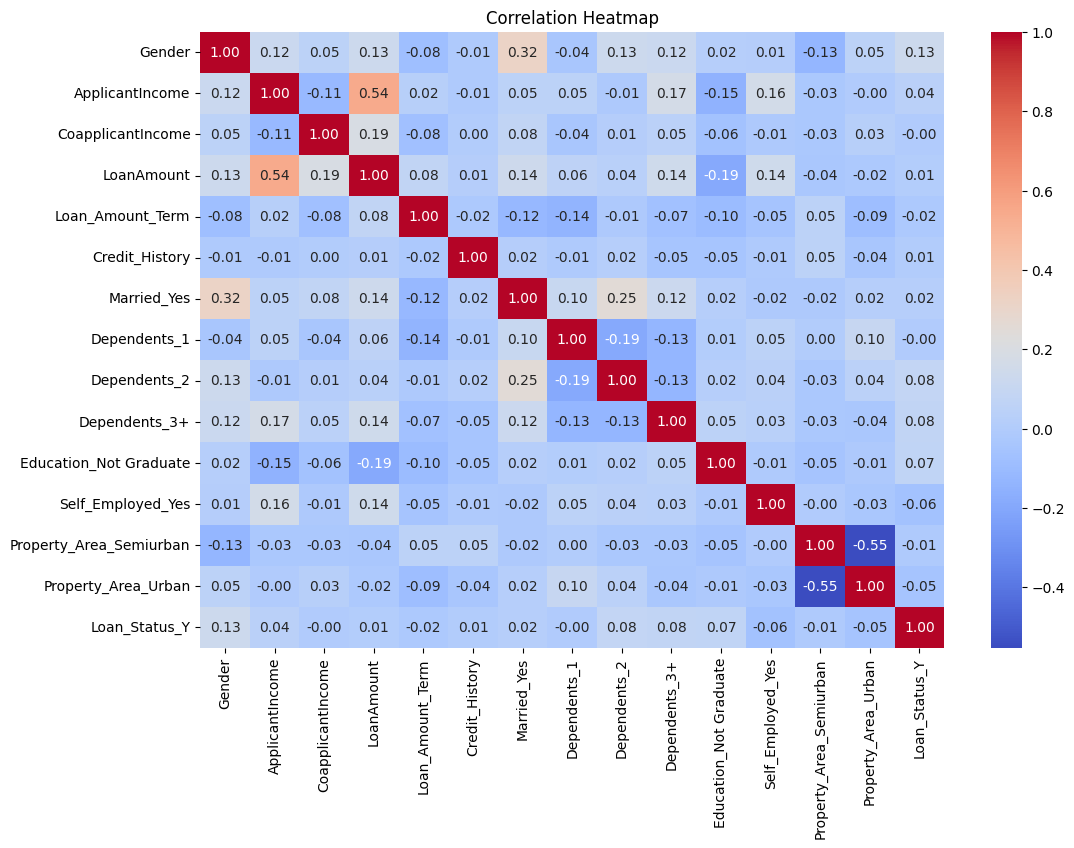

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix , annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**2.Wrapper Method: Recursive Feature Elimination (RFE)**

# **Feature_Selection RFE**

In [ ]:
# Using RandomForestClassifier for feature selection with RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)  # Change to desired number of features
rfe.fit(X_train, y_train)

# Selected features
selected_rfe_features = X_train.columns[rfe.support_]
print("Selected features using RFE:", selected_rfe_features)


Selected features using RFE: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


# **Feature_Selection LASSO**

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Lasso Regression for feature selection
lasso = Lasso(alpha=0.01)  # Set alpha as per requirement
lasso.fit(X_train, y_train)

# Get the selected features
lasso_selected_features = X_train.columns[np.where(lasso.coef_ != 0)[0]]
print("Selected features using Lasso:", lasso_selected_features)


Selected features using Lasso: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Dependents_1',
       'Property_Area_Semiurban'],
      dtype='object')


# **Feature_Selection PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Standardizing the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Applying PCA to the training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with feature contributions to each component
components_df = pd.DataFrame(pca.components_, columns=X_train.columns)

# Print the feature names of the top 3 principal components
print("\nTop 3 Principal Components Feature Names:")
for i in range(min(3, pca.n_components_)):  # Ensure we do not exceed available components
    # Get the indices of the top features contributing to the i-th component
    top_features_indices = components_df.iloc[i].abs().nlargest(5).index
    print(f"\nComponent {i + 1}:")
    print(top_features_indices.tolist())  # Print feature names as a list



Top 3 Principal Components Feature Names:

Component 1:
['LoanAmount', 'ApplicantIncome', 'Gender', 'Married_Yes', 'Dependents_3+']

Component 2:
['Property_Area_Urban', 'Property_Area_Semiurban', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Component 3:
['Married_Yes', 'Dependents_2', 'Property_Area_Urban', 'Gender', 'Property_Area_Semiurban']


# **Feature_Selection Chi2**

In [ ]:
# Using SelectKBest with Chi-squared for feature selection
select_k_best = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = select_k_best.fit_transform(X_train, y_train)

# Get selected feature names
selected_k_best_features = X_train.columns[select_k_best.get_support()]
print("Selected features using SelectKBest:", selected_k_best_features)


Selected features using SelectKBest: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area_Semiurban'],
      dtype='object')


# **Random Forest Classifier**

In [ ]:
def evaluate_model(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_subset, y_train)
    y_pred = rf_model.predict(X_test_subset)

    return accuracy_score(y_test, y_pred)

# Performance evaluation
rfe_score = evaluate_model(selected_rfe_features)
lasso_score = evaluate_model(lasso_selected_features)
k_best_score = evaluate_model(selected_k_best_features)

print("Accuracy using RFE features:", rfe_score)
print("Accuracy using Lasso features:", lasso_score)
print("Accuracy using SelectKBest features:", k_best_score)

# Compare the scores and choose the best method
best_score = max(rfe_score, lasso_score, k_best_score)
if best_score == rfe_score:
    print("Best method: RFE")
elif best_score == lasso_score:
    print("Best method: Lasso")
else:
    print("Best method: SelectKBest")

Accuracy using RFE features: 0.7560975609756098
Accuracy using Lasso features: 0.7967479674796748
Accuracy using SelectKBest features: 0.7723577235772358
Best method: Lasso


# **Logistic Reg**

In [ ]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 10: Prepare the training data with selected features
X_train_logistic = X_train[selected_features]
X_test_logistic = X_test[selected_features]

# Step 4: Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_logistic,y_train)

# Step 5: Make predictions on the test set
y_pred = logreg.predict(X_test_logistic)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.6504065040650406
Precision: 0.65
Recall: 1.00
F1 Score: 0.79


# **KN-Neighbor**

In [ ]:
# Step 1: Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_knn = X_train[lasso_selected_features]
X_test_knn = X_test[lasso_selected_features]



# Step 4: Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors for tuning
knn.fit(X_train_knn, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test_knn)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.5772357723577236
Precision: 0.63
Recall: 0.84
F1 Score: 0.72


# **Decision Tree**

In [ ]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'Loan_Status_Y' is the target column and 'data_encoded' is your dataset

X_train_dtc = X_train[selected_k_best_features]
X_test_dtc = X_test[selected_k_best_features]

# Step 4: Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 5: Train the model
dt_model.fit(X_train_dtc, y_train)

# Step 6: Make predictions on the test set
y_pred = dt_model.predict(X_test_dtc)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.65
Precision: 0.73
Recall: 0.72
F1 Score: 0.73


# **Navis-Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train_gnb = X_train[lasso_selected_features]
X_test_gnb = X_test[lasso_selected_features]


# Step 3: Initialize the Naive Bayes model
nb_model = GaussianNB()  # For continuous features, use GaussianNB

# Step 4: Train the model
nb_model.fit(X_train_gnb, y_train)

# Step 5: Make predictions on the test set
y_pred = nb_model.predict(X_test_gnb)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(X_train_gnb.columns.tolist())


Accuracy: 0.79
Precision: 0.76
Recall: 0.97
F1 Score: 0.86
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Dependents_1', 'Property_Area_Semiurban']


In [ ]:
print(y_train.value_counts())


Loan_Status_Y
True     342
False    149
Name: count, dtype: int64


# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train_svm = X_train[lasso_selected_features]
X_test_svm = X_test[lasso_selected_features]

scaler = StandardScaler()
X_train_svm_scaled = scaler.fit_transform(X_train_svm)
X_test_svm_scaled = scaler.transform(X_test_svm)

# Step 3: Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 4: Train the model
svm_model.fit(X_train_svm_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_svm_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86


# **GradingBoosting Ensemble**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_gbc = X_train[lasso_selected_features]
X_test_gbc = X_test[lasso_selected_features]

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train_gbc, y_train)

y_pred = gb_model.predict(X_test_gbc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.78
Precision: 0.76
Recall: 0.97
F1 Score: 0.85


# **SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Normalize the feature data using StandardScaler

X_train_gsc = X_train[selected_k_best_features]
X_test_gsc = X_test[selected_k_best_features]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_gsc)
X_test_scaled = scaler.transform(X_test_gsc)


svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)





Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
best_svc = grid_search.best_estimator_

# Step 8: Make predictions using the best model
y_pred = best_svc.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best parameters and evaluation metrics
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86


# **XGBClassifier**

In [ ]:
# Step 1: Install xgboost library if not installed
# pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Prepare the training data
X_train_xgb = X_train[selected_k_best_features]
X_test_xgb = X_test[selected_k_best_features]

# Step 3: (Optional) Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_xgb)
X_test_scaled = scaler.transform(X_test_xgb)

# Step 4: Initialize the XGBoost Classifier model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 5: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'max_depth': [3, 4, 5],               # Maximum depth of trees
    'subsample': [0.7, 0.8, 1.0],         # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]                # Minimum loss reduction required to make a further partition
}

# Step 6: Initialize GridSearchCV with XGBoost and hyperparameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Step 7: Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Step 8: Get the best estimator (model with the best hyperparameters)
best_xgb = grid_search.best_estimator_

# Step 9: Make predictions using the best model
y_pred = best_xgb.predict(X_test_scaled)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best parameters and evaluation metrics
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86


# **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Reduced parameter grid for faster computation
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0]
}


random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get best estimator
best_xgb = random_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Best parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Load Module**

In [ ]:
# Step 1: Save the model to a file
with open('navisb_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

print("Model saved to nb_model.pkl")


Model saved to nb_model.pkl


In [ ]:
# Step 2: Load the model from the file (when needed)
with open('navisb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully")

Model loaded successfully
